# Gradient descent exploration

Suppose we need to find solution to the regression (find some parameters for it). It can be computationaly expensive, so instead we define loss function and try to minimize loss function (loss function takes in same parameters as input). We can do it iteratively, jus by sampling values for it and randomly stumbling around (sample random value for each aparmeter and try try try). Or, if we know our loss function and can find derivatives for it with respect to the parameters, we can find the direction parrameters should be changed to minimize loss function

### Vanilla Gradient Descent

In [391]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For animation
from IPython.display import display, clear_output


In [392]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data with a linear relationship: y = 2.5x + 1.5 + noise
data_x = np.linspace(0, 10, 100)
true_slope = 2.5
true_intercept = 1.5
noise = np.random.normal(0, 1, 100)  # Add some noise
data_y = true_slope * data_x + true_intercept + noise

data_x = data_x/25
data_y=data_y/25

In [ ]:
def gradient_descent_meta(data_x, data_y, iterations=250, learning_rate=0.05):
    """gradient_descent(data_x, data_y, iterations=1000, learning_rate=0.05) -> slope, intercept, mc, loss
    linear regression by using the gradient descent algorithm"""
    N = len(data_x)
    m, c = 0, 0  # initial values for m and c
    mc = []      # save the values of m and c for visualization only
    loss = []
    
    for _ in range(iterations):
        # Compute the current error
        y_pred = data_x * m + c      # predicted value
        error =  data_y - y_pred     # vector of differences between predicted and actual
        loss.append (np.sum(error**2)/N)
        
        # Compute the gradient using vectorized operations
        #minus cuz opposite of gradient
        dm = -2/N * np.dot(error, data_x)
        dc = -2/N * np.sum(error)
        
        # dm = -1*0.1*np.dot(error, data_x)
        # dc = -1*0.1*np.sum(error)


        # Update m and c
        m = m - dm * learning_rate
        c = c - dc * learning_rate

        
        # Save the current values of m and c
        mc.append((m, c))

    return m, c, mc, loss


In [ ]:
def gradient_descent_meta(data_x, data_y, iterations=500, learning_rate=0.05, tol=1e-6):
    """gradient_descent(data_x, data_y, iterations=1000, learning_rate=0.05) -> slope, intercept, mc, loss
    linear regression by using the gradient descent algorithm"""
    N = len(data_x)
    m, c = 0, 0  # initial values for m and c
    mc = []      # save the values of m and c for visualization only
    loss = []
    

    while error > tol:
        # Compute the current error
        y = data_x * m + c      # predicted value
        error =  data_y - y     # vector of differences between predicted and actual
        loss.append (np.sum(error**2)/N)
        
        # Compute the gradient using vectorized operations
        # minus cuz opposite of gradient NOOOOOOOOO!
        dm = -2/N * np.dot(error, data_x)
        dc = -2/N * np.sum(error)
        
        # dm = -1*0.1*np.dot(error, data_x)
        # dc = -1*0.1*np.sum(error)


        # Update m and c
        m = m - dm * learning_rate #NOOOWWW you take the negative gradient
        c = c - dc * learning_rate
        
        # Save the current values of m and c
        mc.append((m, c))

    return m, c, mc, loss

In [394]:
slope, intercept,mc,loss = gradient_descent_meta(data_x, data_y)
print("Slope (m):", slope)
print("Intercept (c):", intercept)

Slope (m): 0.7801535991017987
Intercept (c): 0.4044081833014361


Text(0, 0.5, 'Loss')

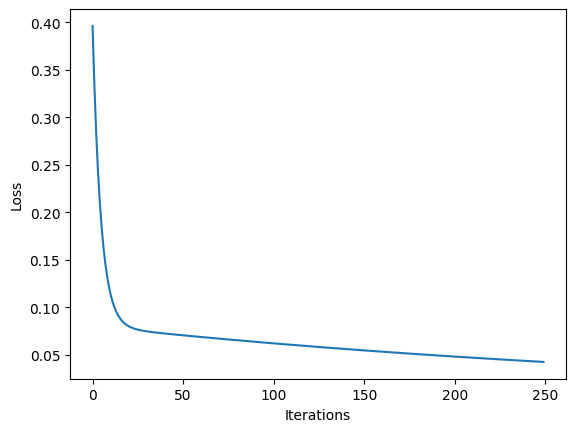

In [395]:
# The loss is decreasing with the number of iterations

plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")


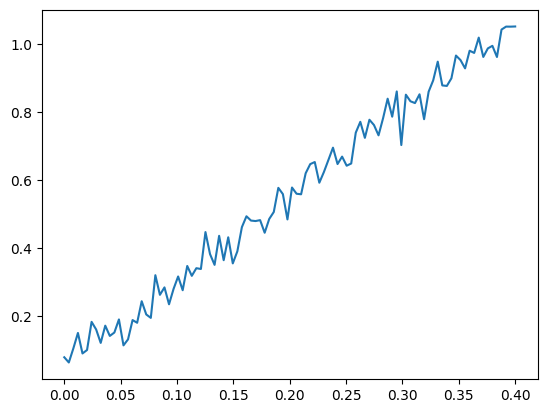

In [396]:
# The loss is decreasing with the number of iterations

plt.plot(data_x,data_y)



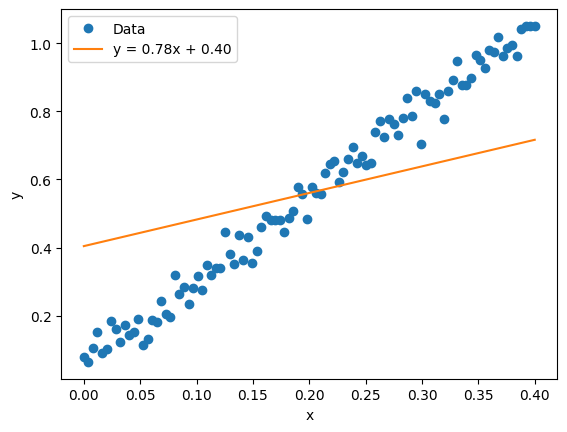

In [397]:
# Plot the original data points
plt.plot(data_x, data_y, 'o', label='Data')  # 'o' for scatter points

# Plot the regression line y = mx + c
y_pred = slope * data_x + intercept
plt.plot(data_x, y_pred, '-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Mini Batch

https://www.geeksforgeeks.org/machine-learning/different-variants-of-gradient-descent/

### Stochastic gradient descent

https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [398]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data with a linear relationship: y = 2.5x + 1.5 + noise
data_x = np.linspace(0, 10, 1000000)
true_slope = 2.5
true_intercept = 1.5
noise = np.random.normal(0, 1, 1000000)  # Add some noise
data_y = true_slope * data_x + true_intercept + noise

data_x = data_x/25
data_y=data_y/25

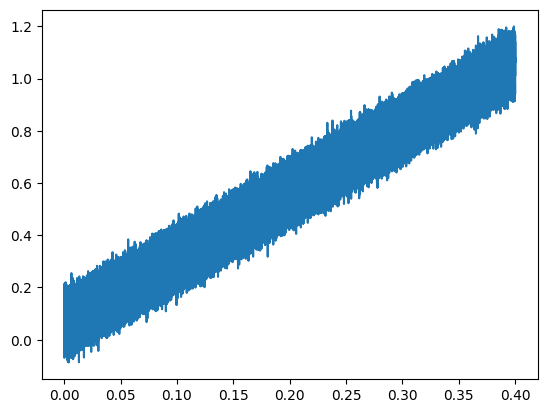

In [399]:
# The loss is decreasing with the number of iterations

plt.plot(data_x,data_y)

In [400]:
def gradient_descent_stoch(data_x, data_y, iterations=250, learning_rate=0.05):
    N = len(data_x)
    m, c = 0, 0
    mc = []
    loss = []
    
    for i in range(iterations):
        # Random sample selection
        idx = np.random.randint(0, N)  # Faster than np.random.choice
        
        # Compute prediction and error for single sample
        y_pred = data_x[idx] * m + c
        error = data_y[idx] - y_pred
        
        # Loss for this single sample
        loss.append(error**2)
        
        # Gradients for SGD (batch size = 1)
        dm = -2 * error * data_x[idx]
        dc = -2 * error
        
        # Update parameters
        m = m - dm * learning_rate
        c = c - dc * learning_rate
        
        mc.append((m, c))
    
    return m, c, mc, loss

In [ ]:
slope, intercept,mc,loss = gradient_descent_meta(data_x, data_y,iterations=25000)

In [402]:
slope, intercept,mc,loss = gradient_descent_stoch(data_x, data_y,iterations=25000)
print("Slope (m):", slope)
print("Intercept (c):", intercept)

Slope (m): 2.505072048084994
Intercept (c): 0.049385631239334864


Text(0, 0.5, 'Loss')

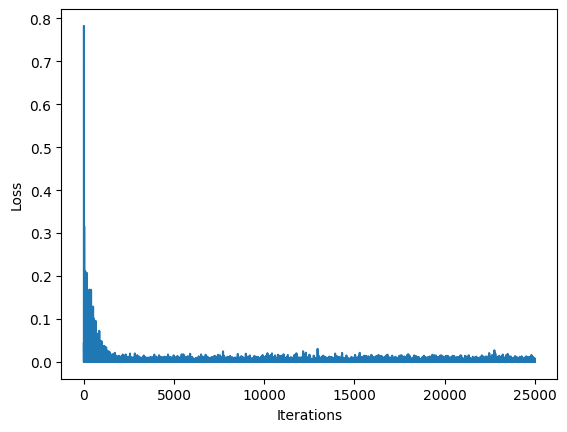

In [403]:
# The loss is decreasing with the number of iterations

plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")


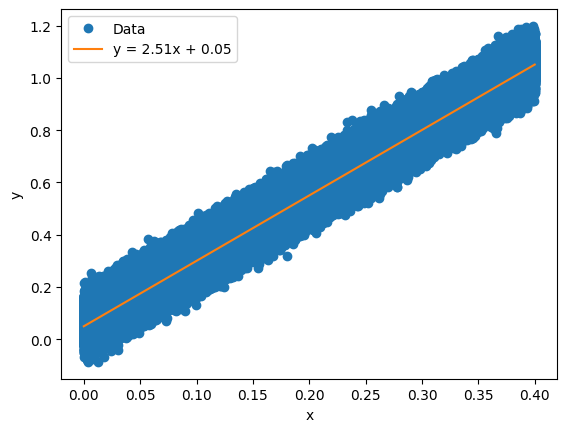

In [404]:
# Plot the original data points
plt.plot(data_x, data_y, 'o', label='Data')  # 'o' for scatter points

# Plot the regression line y = mx + c
y_pred = slope * data_x + intercept
plt.plot(data_x, y_pred, '-', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Conjugate gradient method

https://en.wikipedia.org/wiki/Conjugate_gradient_method

https://en.wikipedia.org/wiki/Derivation_of_the_conjugate_gradient_method

instead of making uneducated steps of varying lentth (zigzag) we make 100% precise and educated steps, one in each dimension. educated steps do not interfere with each other cuz they are conjugate (perpendicular in high dimensions, they have 0 in common with each other)

In [405]:
import numpy as np

def conjugate_gradient(A, b, x0, tol=None):
    """
    Return the solution to `A * x = b` using the conjugate gradient method.
    Reminder: A should be symmetric and positive definite.
    
    Parameters:
    -----------
    A : ndarray
        Coefficient matrix (n x n), should be symmetric and positive definite
    b : ndarray
        Right-hand side vector (n,)
    x0 : ndarray
        Initial guess (n,)
    tol : float, optional
        Convergence tolerance (default: machine epsilon)
    
    Returns:
    --------
    x : ndarray
        Solution vector (n,)
    """
    if tol is None:
        tol = np.finfo(float).eps
    
    r = b - A @ x0
    p = r.copy()
    rsold = r @ r
    
    x = x0.copy()

    iter = 0
    loss = []
    
    while np.sqrt(rsold) > tol and iter < 200:
        Ap = A @ p
        alpha = rsold / (p @ Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = r @ r
        p = r + (rsnew / rsold) * p
        rsold = rsnew
        loss.append(np.sqrt(rsold))
        iter += 1
    

    return x,iter,loss

In [406]:
# Example 2: Larger 5x5 system (random symmetric positive definite)
print("\n" + "=" * 60)
print("Example 2: 5x5 Random Symmetric Positive Definite System")
print("=" * 60)

np.random.seed(42)
n = 5

# Generate a random symmetric positive definite matrix
# Method: A = Q^T Q where Q is random, guarantees positive definite
Q = np.random.randn(n, n)
A2 = Q.T @ Q + np.eye(n)  # Add identity to ensure positive definiteness

b2 = np.random.randn(n)
x0_2 = np.zeros(n)

print(f"\nMatrix A (5x5):\n{A2}")
print(f"Vector b: {b2}")
print(f"Initial guess x0: {x0_2}")
print(f"\nTrue solution (using np.linalg.solve):\n{np.linalg.solve(A2, b2)}")
print("\nConjugate Gradient iterations:")

x_solution2, conj_iter,loss = conjugate_gradient(A2, b2, x0_2, tol=1e-10)

print(f"\nFinal solution:\n{x_solution2}")
print("Number of iterations:", conj_iter)
print("losses:", loss)
print(f"Error: {np.linalg.norm(A2 @ x_solution2 - b2):.6e}")


Example 2: 5x5 Random Symmetric Positive Definite System

Matrix A (5x5):
[[ 3.9805946   0.01599104 -0.04782309  0.17546989  0.55226368]
 [ 0.01599104  4.80673615  0.67617578  1.18044033  3.24587224]
 [-0.04782309  0.67617578  2.17031369 -0.21833843 -0.63321793]
 [ 0.17546989  1.18044033 -0.21833843 10.05508255  4.74692465]
 [ 0.55226368  3.24587224 -0.63321793  4.74692465  6.61549503]]
Vector b: [ 0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375]
Initial guess x0: [0. 0. 0. 0. 0.]

True solution (using np.linalg.solve):
[-0.00748897 -0.49920661  0.4162938  -0.16012237  0.35620865]

Conjugate Gradient iterations:

Final solution:
[-0.00748897 -0.49920661  0.4162938  -0.16012237  0.35620865]
Number of iterations: 5
losses: [np.float64(1.003438829758521), np.float64(0.7385825181027877), np.float64(0.1446918946392473), np.float64(0.007231231358445783), np.float64(8.833919016873741e-15)]
Error: 1.004506e-14


### Quasi-Newton method

https://en.wikipedia.org/wiki/Quasi-Newton_method